In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from math import *

In [13]:
files = [file for file in os.listdir("./201719Data")]
all_years_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./201719Data/"+file)
    all_years_data = pd.concat([all_years_data, df])

all_years_data.to_csv("201719Philadelphia.csv", index=False)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
all_data = pd.read_csv('201719Philadelphia.csv')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (10,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
del all_data['trip_id']
del all_data['start_lat']
del all_data['start_lon']
del all_data['end_lat']
del all_data['end_lon']
del all_data['plan_duration']
del all_data['trip_route_category']
all_data.head()

,duration,start_time,end_time,start_station,end_station,bike_id,passholder_type,bike_type
0,30,2018-10-01 00:03:00,2018-10-01 00:33:00,3038,3063,11908,Indego30,standard
1,7,2018-10-01 00:06:00,2018-10-01 00:13:00,3032,3064,5382,Indego30,standard
2,6,2018-10-01 00:07:00,2018-10-01 00:13:00,3032,3064,11930,Indego30,standard
3,6,2018-10-01 00:14:00,2018-10-01 00:20:00,3025,3007,5225,Indego30,standard
4,6,2018-10-01 00:17:00,2018-10-01 00:23:00,3029,3035,3379,Indego30,standard


In [4]:
all_data['start_time'] = pd.to_datetime(all_data["start_time"])
all_data['end_time'] = pd.to_datetime(all_data["end_time"])
all_data['year'] = all_data["start_time"].dt.year
all_data['month'] = all_data["start_time"].dt.month

In [5]:
all_data['start_hour'] = all_data['start_time'].dt.hour
all_data['day_of_week'] = all_data['start_time'].dt.day_name()

In [6]:
all_data.head()

,duration,start_time,end_time,start_station,end_station,bike_id,passholder_type,bike_type,year,month,start_hour,day_of_week
0,30,2018-10-01 00:03:00,2018-10-01 00:33:00,3038,3063,11908,Indego30,standard,2018,10,0,Monday
1,7,2018-10-01 00:06:00,2018-10-01 00:13:00,3032,3064,5382,Indego30,standard,2018,10,0,Monday
2,6,2018-10-01 00:07:00,2018-10-01 00:13:00,3032,3064,11930,Indego30,standard,2018,10,0,Monday
3,6,2018-10-01 00:14:00,2018-10-01 00:20:00,3025,3007,5225,Indego30,standard,2018,10,0,Monday
4,6,2018-10-01 00:17:00,2018-10-01 00:23:00,3029,3035,3379,Indego30,standard,2018,10,0,Monday


In [7]:
all_data['duration'].describe()

count    2.204985e+06
mean     8.046082e+01
std      9.677214e+02
min      1.000000e+00
25%      7.000000e+00
50%      1.200000e+01
75%      2.100000e+01
max      8.640000e+04
Name: duration, dtype: float64

In [8]:
#Based on the pricing system I'd expect the majority of rides to be under 2 hours
#and no longer than 4 hours
no_outliers_data = all_data[all_data['duration'] < 240]
no_outliers_data.head()

,duration,start_time,end_time,start_station,end_station,bike_id,passholder_type,bike_type,year,month,start_hour,day_of_week
0,30,2018-10-01 00:03:00,2018-10-01 00:33:00,3038,3063,11908,Indego30,standard,2018,10,0,Monday
1,7,2018-10-01 00:06:00,2018-10-01 00:13:00,3032,3064,5382,Indego30,standard,2018,10,0,Monday
2,6,2018-10-01 00:07:00,2018-10-01 00:13:00,3032,3064,11930,Indego30,standard,2018,10,0,Monday
3,6,2018-10-01 00:14:00,2018-10-01 00:20:00,3025,3007,5225,Indego30,standard,2018,10,0,Monday
4,6,2018-10-01 00:17:00,2018-10-01 00:23:00,3029,3035,3379,Indego30,standard,2018,10,0,Monday


In [9]:
no_outliers_data.replace({'Indego30':'Subscriber', 'Indego365':'Subscriber', 'Day Pass':'Customer', 'Walk-up':'Customer', 'IndegoFlex':'Customer', 'One Day Pass':'Customer', 'Two Day Pass':'Customer'}, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [11]:
no_outliers_data['duration'].describe()

count    2.085896e+06
mean     1.766316e+01
std      2.259090e+01
min      1.000000e+00
25%      7.000000e+00
50%      1.100000e+01
75%      1.900000e+01
max      2.390000e+02
Name: duration, dtype: float64

In [12]:
# Save cleaned data to a csv file to begin analysis
cleaned_data = no_outliers_data
cleaned_data.to_csv("201719PhiladelphiaCleaned.csv", index=False)

#### Start of Data Analysis

In [13]:
data = pd.read_csv("201719PhiladelphiaCleaned.csv")
data.head()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,duration,start_time,end_time,start_station,end_station,bike_id,passholder_type,bike_type,year,month,start_hour,day_of_week
0,30,2018-10-01 00:03:00,2018-10-01 00:33:00,3038,3063,11908,Subscriber,standard,2018,10,0,Monday
1,7,2018-10-01 00:06:00,2018-10-01 00:13:00,3032,3064,5382,Subscriber,standard,2018,10,0,Monday
2,6,2018-10-01 00:07:00,2018-10-01 00:13:00,3032,3064,11930,Subscriber,standard,2018,10,0,Monday
3,6,2018-10-01 00:14:00,2018-10-01 00:20:00,3025,3007,5225,Subscriber,standard,2018,10,0,Monday
4,6,2018-10-01 00:17:00,2018-10-01 00:23:00,3029,3035,3379,Subscriber,standard,2018,10,0,Monday


In [14]:
data['start_station']=data['start_station'].astype(str)

In [15]:
data['end_station']=data['end_station'].astype(str)

In [16]:
# Create dataframes for each year
grouped = data.groupby(data['year'])
df1 = grouped.get_group(2017)
df2 = grouped.get_group(2018)
df3 = grouped.get_group(2019)

In [17]:
users = data['passholder_type'].value_counts().keys().to_list()
count = data['passholder_type'].value_counts().to_list()

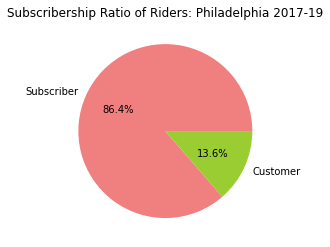

In [18]:
plt.pie(count, labels=users, colors = ['lightcoral', 'yellowgreen'], autopct='%1.1f%%')
plt.title("Subscribership Ratio of Riders: Philadelphia 2017-19")
plt.show()

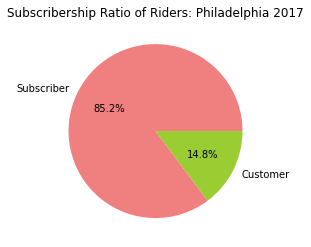

In [19]:
users_17 = df1['passholder_type'].value_counts().keys().to_list()
count_17 = df1['passholder_type'].value_counts().to_list()

plt.pie(count_17, labels=users_17, colors = ['lightcoral', 'yellowgreen'], autopct='%1.1f%%')
plt.title("Subscribership Ratio of Riders: Philadelphia 2017")
plt.show()

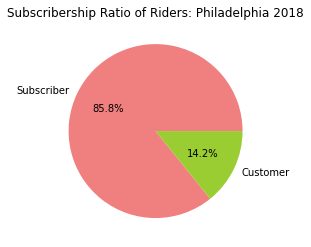

In [20]:
users_18 = df2['passholder_type'].value_counts().keys().to_list()
count_18 = df2['passholder_type'].value_counts().to_list()

plt.pie(count_18, labels=users_18, colors = ['lightcoral', 'yellowgreen'], autopct='%1.1f%%')
plt.title("Subscribership Ratio of Riders: Philadelphia 2018")
plt.show()

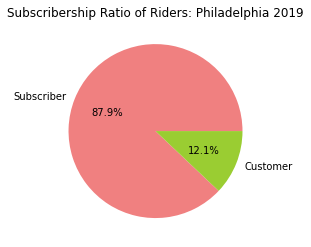

In [21]:
users_19 = df3['passholder_type'].value_counts().keys().to_list()
count_19 = df3['passholder_type'].value_counts().to_list()

plt.pie(count_19, labels=users_19, colors = ['lightcoral', 'yellowgreen'], autopct='%1.1f%%')
plt.title("Subscribership Ratio of Riders: Philadelphia 2019")
plt.show()

In [22]:
#track ridership per year
years = data['year'].value_counts().keys().to_list()
rides = data['year'].value_counts().to_list()

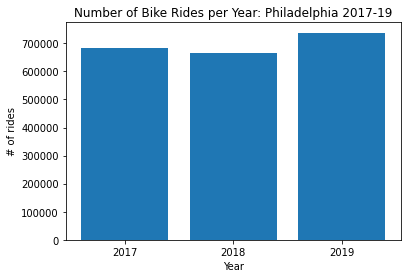

In [23]:
plt.bar(years, rides)
plt.xticks(years)
plt.xlabel("Year")
plt.ylabel("# of rides")
plt.title("Number of Bike Rides per Year: Philadelphia 2017-19")
plt.show()

In [24]:
num_bikes_year =[]
num_bikes1 = len(df1['bike_id'].unique())
num_bikes_year.append(num_bikes1)

In [25]:
num_bikes2 = len(df2['bike_id'].unique())
num_bikes_year.append(num_bikes2)

In [26]:
num_bikes3 = len(df3['bike_id'].unique())
num_bikes_year.append(num_bikes3)

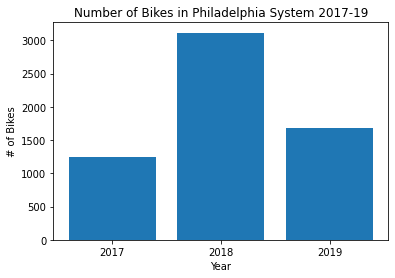

In [27]:
plt.bar([2017, 2018, 2019], num_bikes_year)
plt.xticks([2017, 2018, 2019])
plt.xlabel("Year")
plt.ylabel("# of Bikes")
plt.title("Number of Bikes in Philadelphia System 2017-19")
plt.show()

In [28]:
#track rides by day of week over 3 year period
days = data['day_of_week'].value_counts().keys().to_list()
rides = data['day_of_week'].value_counts().to_list()
#Hardcoded the sorting into order of the week
days_sorted = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rides_sorted = [302195,326625,329974,322792,314527,259321,230462]

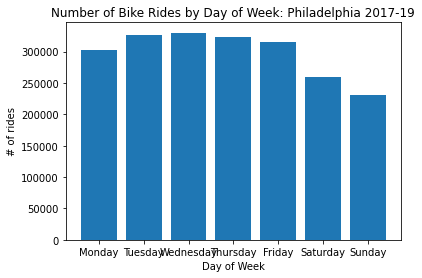

In [29]:
plt.bar(days_sorted, rides_sorted)
plt.xticks(days_sorted)
plt.xlabel("Day of Week")
plt.ylabel("# of rides")
plt.title("Number of Bike Rides by Day of Week: Philadelphia 2017-19")
plt.show()

In [30]:
#Make a data frame for weekdays and weekend
mask = data['day_of_week'].isin(['Saturday','Sunday'])
weekend_df=data[mask]
weekday_df=data[~mask]

In [31]:
weekend_hours = weekend_df['start_hour'].value_counts().keys().to_list()
weekend_count = weekend_df['start_hour'].value_counts().to_list()

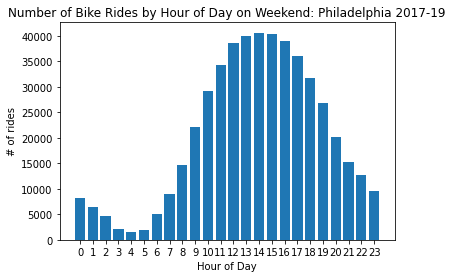

In [32]:
plt.bar(weekend_hours, weekend_count)
plt.xticks(weekend_hours)
plt.xlabel("Hour of Day")
plt.ylabel("# of rides")
plt.title("Number of Bike Rides by Hour of Day on Weekend: Philadelphia 2017-19")
plt.show()

In [33]:
weekday_hours = weekday_df['start_hour'].value_counts().keys().to_list()
weekday_count = weekday_df['start_hour'].value_counts().to_list()

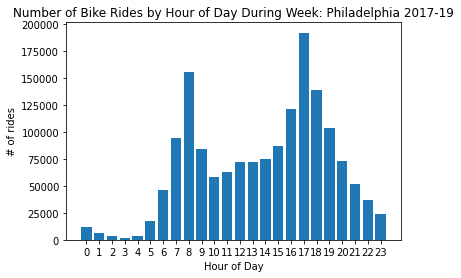

In [34]:
plt.bar(weekday_hours, weekday_count)
plt.xticks(weekday_hours)
plt.xlabel("Hour of Day")
plt.ylabel("# of rides")
plt.title("Number of Bike Rides by Hour of Day During Week: Philadelphia 2017-19")
plt.show()

In [35]:
weekend_dict = dict(zip(weekend_hours, weekend_count))
weekend_keys = (list(weekend_dict.keys()))
weekend_keys.sort()

weekend_sorted={}
for e in weekend_keys:
    weekend_sorted[e]=weekend_dict[e]

weekend_keys = list(weekend_sorted.keys())
weekend_values = list(weekend_sorted.values())

In [36]:
weekday_dict = dict(zip(weekday_hours, weekday_count))
weekday_keys = (list(weekday_dict.keys()))
weekday_keys.sort()

weekday_sorted={}
for e in weekday_keys:
    weekday_sorted[e]=weekday_dict[e]

weekday_keys = list(weekday_sorted.keys())
weekday_values = list(weekday_sorted.values())

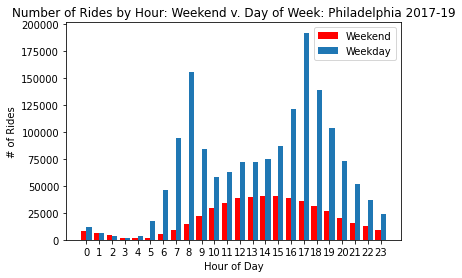

In [37]:
x = np.arange(len(weekend_keys))
ax = plt.subplot(111)
ax.bar(x-0.2, weekend_values, width=0.4, color='r', align='center', label='Weekend')
ax.bar(x+0.2, weekday_values, width=0.4, align='center', label='Weekday')
plt.xticks(weekend_keys)
plt.xlabel('Hour of Day')
plt.ylabel('# of Rides')
plt.title('Number of Rides by Hour: Weekend v. Day of Week: Philadelphia 2017-19')
plt.legend(loc = 'best')
plt.show()

In [38]:
#track rides by month over 3 year period
months = data['month'].value_counts().keys().to_list()
num_riders = data['month'].value_counts().to_list()

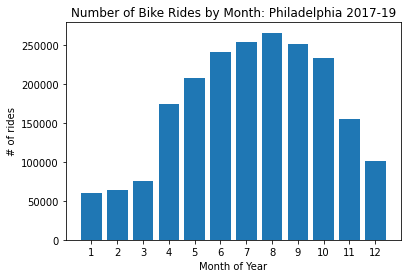

In [39]:
plt.bar(months, num_riders)
plt.xticks(months)
plt.xlabel("Month of Year")
plt.ylabel("# of rides")
plt.title("Number of Bike Rides by Month: Philadelphia 2017-19")
plt.show()

In [40]:
#track most common and least common start stations over 3 year period
start_stations = data['start_station'].value_counts().keys().to_list()
num_start = data['start_station'].value_counts().to_list()

start_dict = dict(zip(start_stations, num_start))

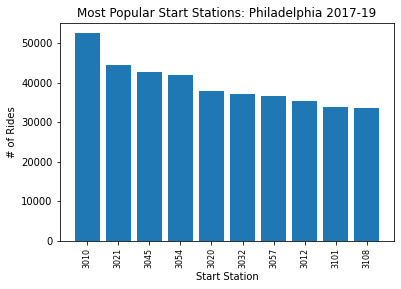

In [41]:
plt.bar(start_stations[0:10], num_start[0:10])
plt.xticks(start_stations[0:10], rotation='vertical', size=8)
plt.xlabel("Start Station")
plt.ylabel("# of Rides")
plt.title("Most Popular Start Stations: Philadelphia 2017-19")
plt.show()

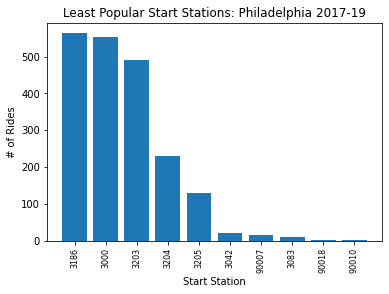

In [42]:
plt.bar(start_stations[-10:], num_start[-10:])
plt.xticks(start_stations[-10:], rotation='vertical', size=8)
plt.xlabel("Start Station")
plt.ylabel("# of Rides")
plt.title("Least Popular Start Stations: Philadelphia 2017-19")
plt.show()

In [43]:
#track most common and leas common end stations over 3 year period
end_stations = data['end_station'].value_counts().keys().to_list()
num_end = data['end_station'].value_counts().to_list()

end_dict = dict(zip(end_stations, num_end))

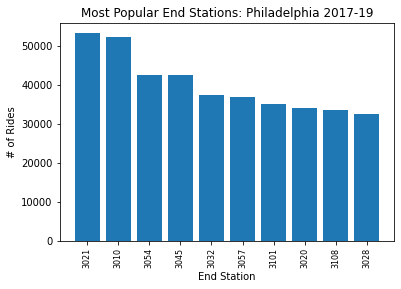

In [44]:
plt.bar(end_stations[0:10], num_end[0:10])
plt.xticks(end_stations[0:10], rotation='vertical', size=8)
plt.xlabel("End Station")
plt.ylabel("# of Rides")
plt.title("Most Popular End Stations: Philadelphia 2017-19")
plt.show()

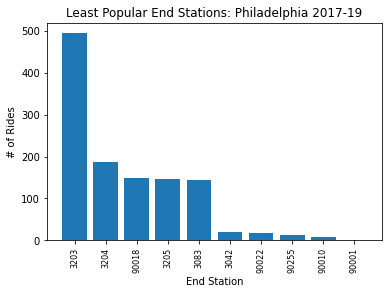

In [45]:
plt.bar(end_stations[-10:], num_end[-10:])
plt.xticks(end_stations[-10:], rotation='vertical', size=8)
plt.xlabel("End Station")
plt.ylabel("# of Rides")
plt.title("Least Popular End Stations: Philadelphia 2017-19")
plt.show()

In [46]:
#combine start and end dicts and sort by value
def combine(d1, d2):
    new_dict=d1
    for key in d2:
        if key in new_dict:
            new_dict[key] += d2[key]
        else:
            new_dict[key]=d2[key]
    return new_dict

#Sort overall dict by value in increasing order to identify top and bottom stations
overall_dict = combine(start_dict, end_dict)
overall_dict={k: v for k, v in sorted(overall_dict.items(), key=lambda item: item[1])}


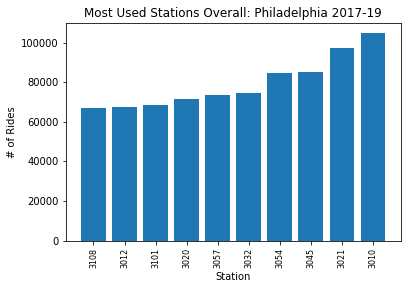

In [47]:
plt.bar((list(overall_dict.keys()))[-10:], (list(overall_dict.values()))[-10:])
plt.xticks((list(overall_dict.keys()))[-10:], rotation='vertical', size=8)
plt.xlabel("Station")
plt.ylabel("# of Rides")
plt.title("Most Used Stations Overall: Philadelphia 2017-19")
plt.show()


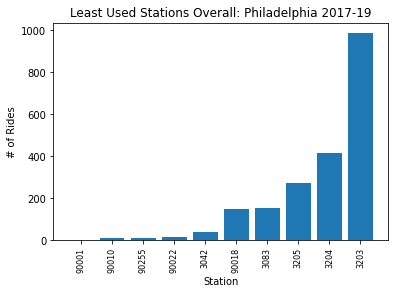

In [48]:
plt.bar((list(overall_dict.keys()))[0:10], (list(overall_dict.values()))[0:10])
plt.xticks((list(overall_dict.keys()))[0:10], rotation='vertical', size=8)
plt.xlabel("Station")
plt.ylabel("# of Rides")
plt.title("Least Used Stations Overall: Philadelphia 2017-19")
plt.show()

In [49]:
#How does the number of stations change?
num_stations=[]
stations_2017 = len(list(pd.concat([df1['start_station'], df1['end_station']]).unique()))
num_stations.append(stations_2017)

In [50]:
stations_2018 = len(list(pd.concat([df2['start_station'], df2['end_station']]).unique()))
num_stations.append(stations_2018)

In [51]:
stations_2019 = len(list(pd.concat([df3['start_station'], df3['end_station']]).unique()))
num_stations.append(stations_2019)

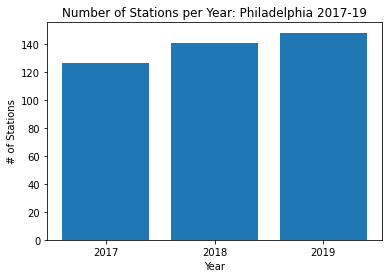

In [52]:
plt.bar([2017,2018,2019], num_stations)
plt.xticks([2017,2018,2019])
plt.xlabel("Year")
plt.ylabel("# of Stations")
plt.title("Number of Stations per Year: Philadelphia 2017-19")
plt.show()

In [53]:
#determine tripduration statistics (min, max, average, std, etc.)
data['duration'].describe()

count    2.085896e+06
mean     1.766316e+01
std      2.259090e+01
min      1.000000e+00
25%      7.000000e+00
50%      1.100000e+01
75%      1.900000e+01
max      2.390000e+02
Name: duration, dtype: float64

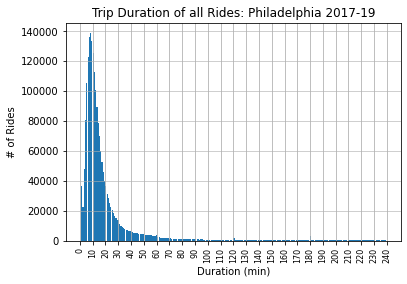

In [54]:
times = data['duration']
times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of all Rides: Philadelphia 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)

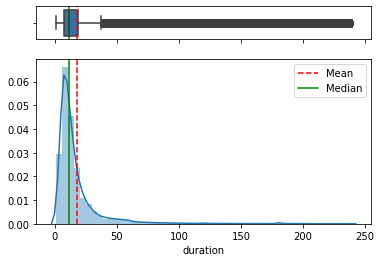

In [55]:
#Box plot and Dist plot with mean and median lines
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=data['duration'].mean()
median=data['duration'].median()

sns.boxplot(data['duration'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(data['duration'], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

In [56]:
#Subcriber v Customer Rides
grouped_user = data.groupby(data['passholder_type'])
df_sub = grouped_user.get_group('Subscriber')
df_cust = grouped_user.get_group('Customer')

In [57]:
df_sub['duration'].describe()

count    1.801462e+06
mean     1.548102e+01
std      1.959156e+01
min      1.000000e+00
25%      7.000000e+00
50%      1.100000e+01
75%      1.600000e+01
max      2.390000e+02
Name: duration, dtype: float64

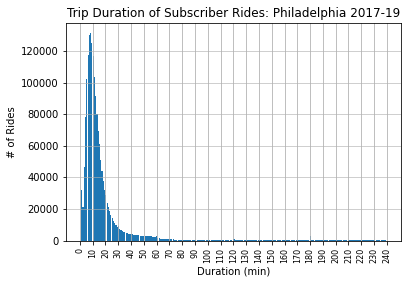

In [58]:
sub_times = df_sub['duration']
sub_times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of Subscriber Rides: Philadelphia 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)

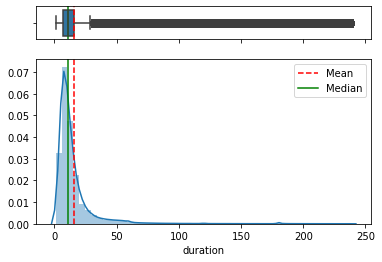

In [59]:
#Box plot and Dist plot with mean and median lines
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df_sub['duration'].mean()
median=df_sub['duration'].median()

sns.boxplot(df_sub['duration'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(df_sub['duration'], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

In [60]:
df_cust['duration'].describe()

count    284399.000000
mean         31.484794
std          33.022167
min           1.000000
25%          13.000000
50%          21.000000
75%          35.000000
max         239.000000
Name: duration, dtype: float64

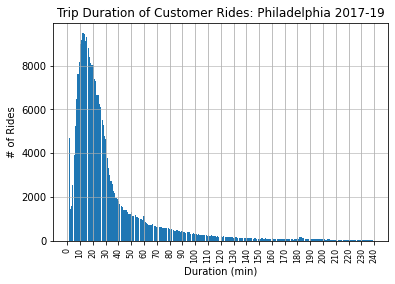

In [61]:
cust_times = df_cust['duration']
cust_times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of Customer Rides: Philadelphia 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)

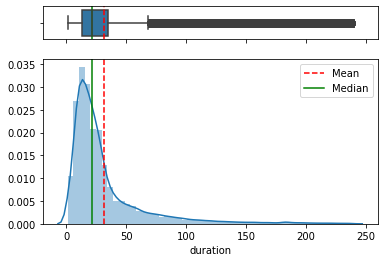

In [62]:
#Box plot and Dist plot with mean and median lines
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df_cust['duration'].mean()
median=df_cust['duration'].median()

sns.boxplot(df_cust['duration'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(df_cust['duration'], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

In [63]:
weekend_df['duration'].describe()

count    489783.000000
mean         22.124096
std          27.190656
min           1.000000
25%           8.000000
50%          13.000000
75%          25.000000
max         239.000000
Name: duration, dtype: float64

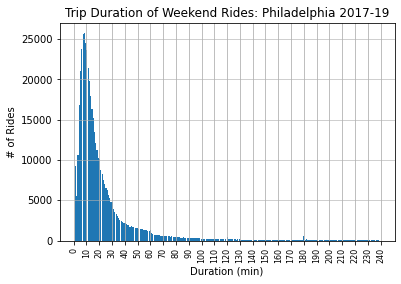

In [64]:
weekend_times = weekend_df['duration']
weekend_times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of Weekend Rides: Philadelphia 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)

In [65]:
weekday_df['duration'].describe()

count    1.596113e+06
mean     1.629428e+01
std      2.078709e+01
min      1.000000e+00
25%      7.000000e+00
50%      1.100000e+01
75%      1.700000e+01
max      2.390000e+02
Name: duration, dtype: float64

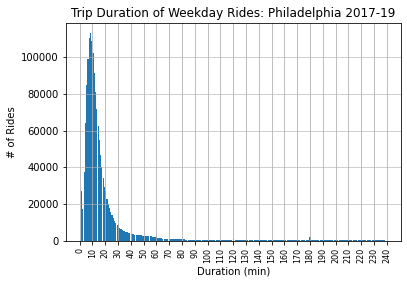

In [66]:
weekday_times = weekday_df['duration']
weekday_times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of Weekday Rides: Philadelphia 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)